<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [ ]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

In [ ]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv


In [3]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(url)

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [4]:
print("Dimensiones del dataset:", df.shape)
display(df.head())
df.info()
display(df.describe())
print(df.isnull().sum())
print("Total de valores faltantes:", df.isnull().sum().sum())

Dimensiones del dataset: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Total de valores faltantes: 207


3. Determinar los elementos únicos dentro de la columna ocean_proximity.


In [5]:
df["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


In [6]:
cols = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
df.groupby("ocean_proximity")[cols].mean()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

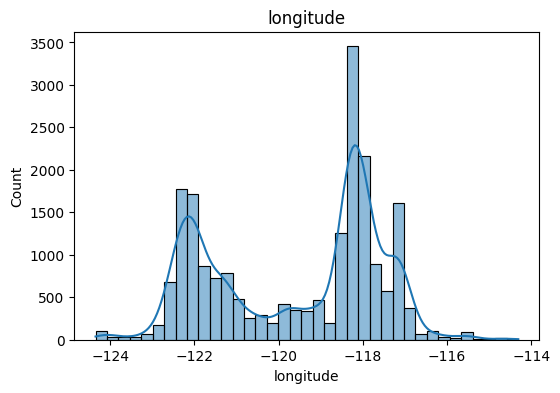

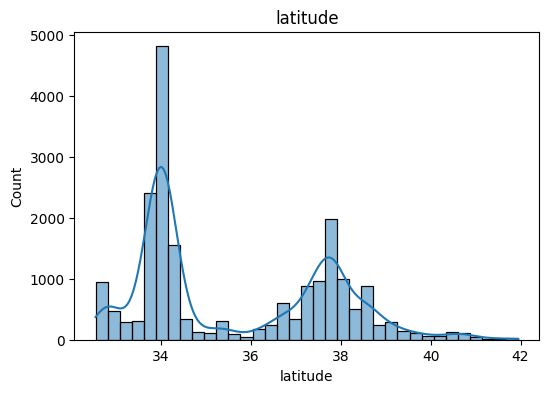

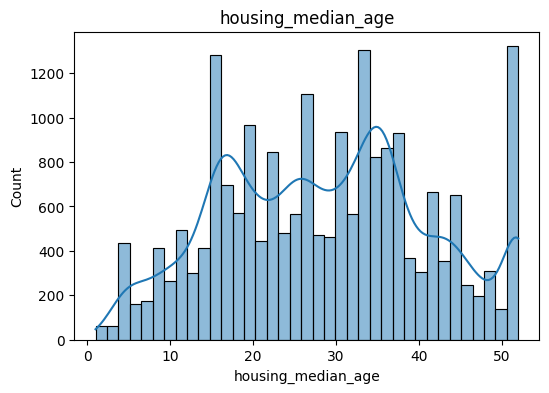

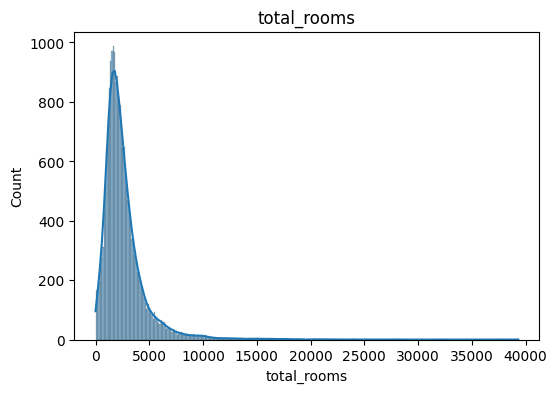

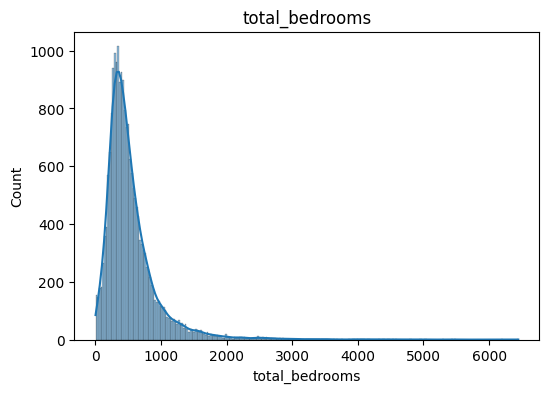

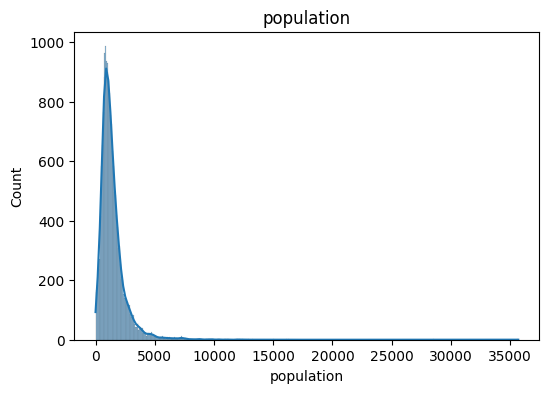

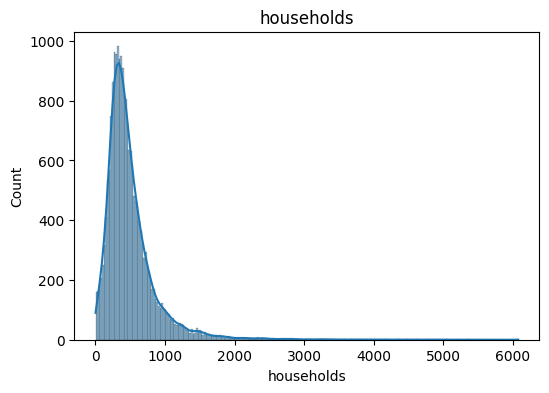

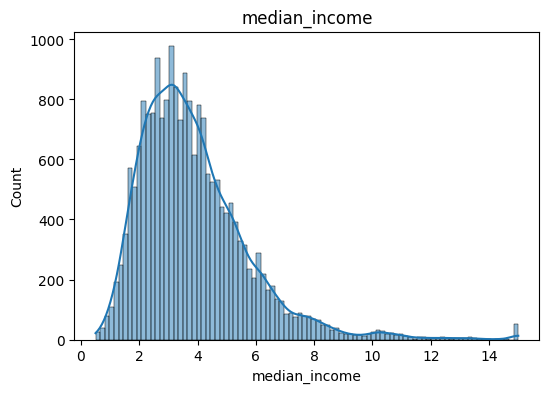

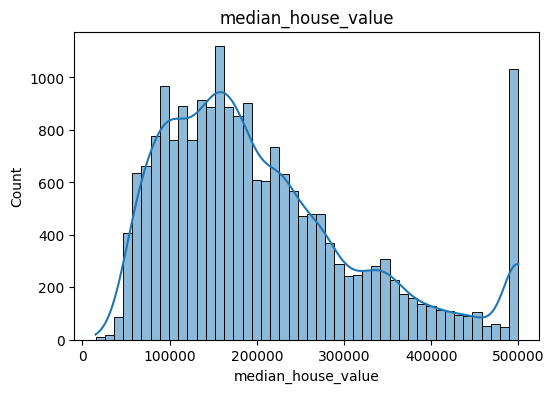

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=["float64", "int64"]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

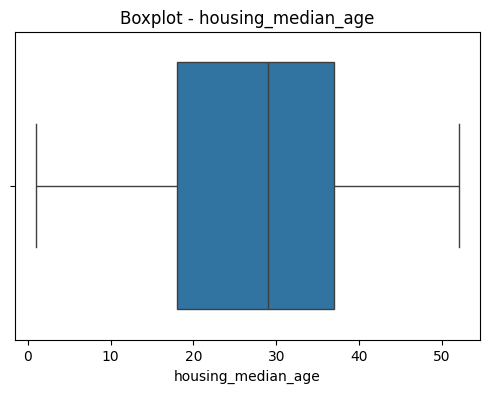

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["housing_median_age"])
plt.title("Boxplot - housing_median_age")
plt.show()


7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

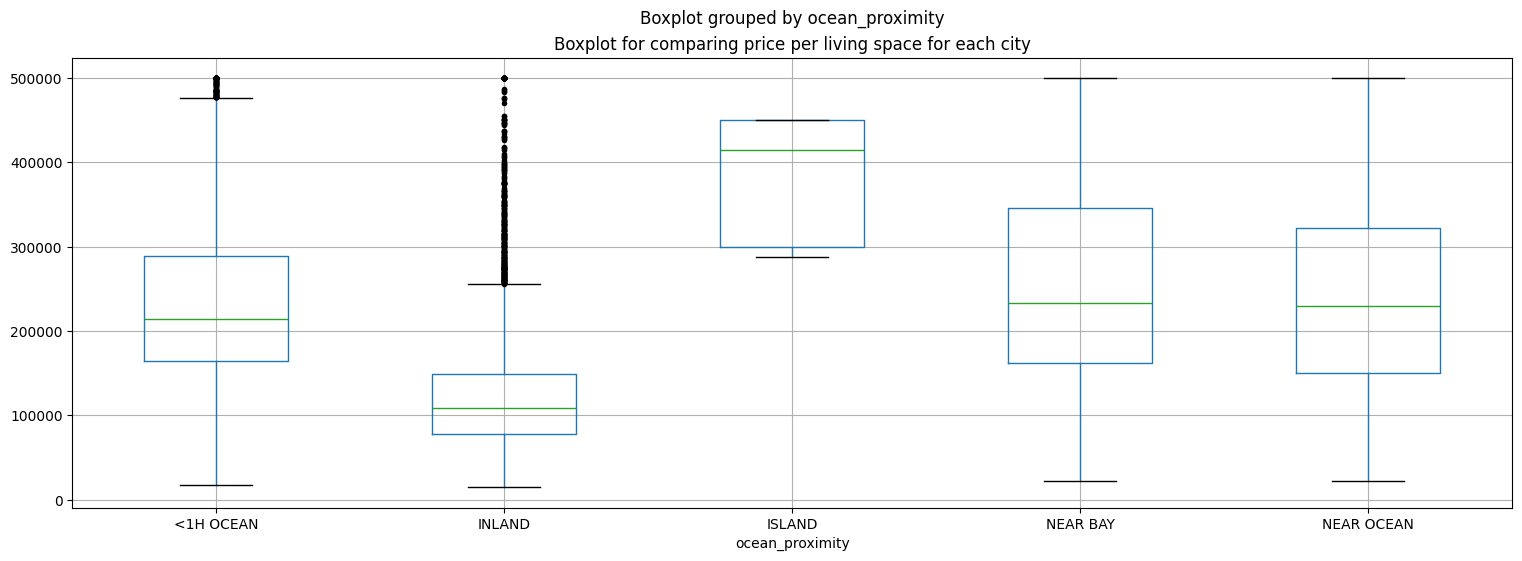

In [9]:
df.boxplot(column="median_house_value", by="ocean_proximity", sym='k.', figsize=(18,6))
plt.title("Boxplot for comparing price per living space for each city")
plt.show()


8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

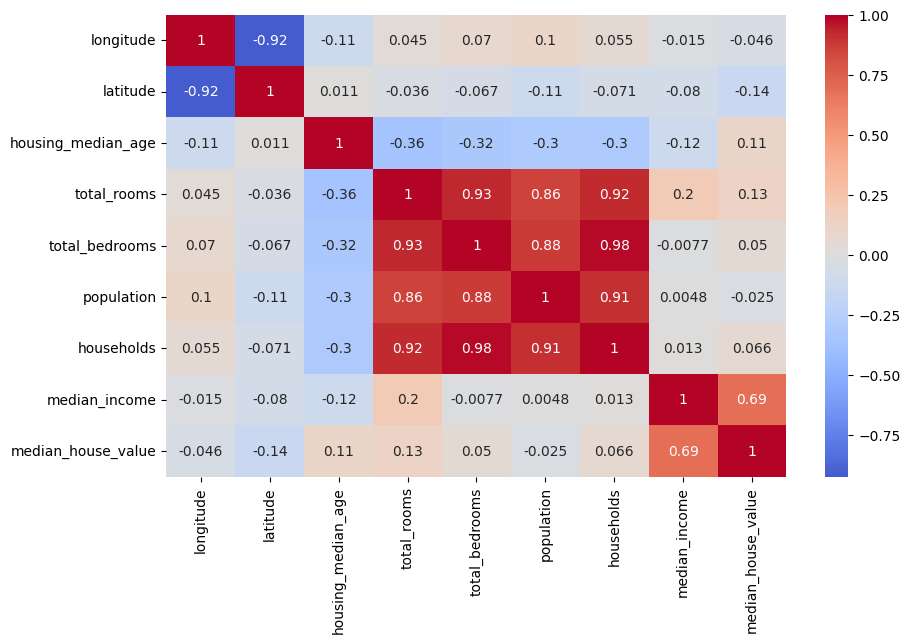

In [10]:
corr_matrix = df.select_dtypes(include=["float64", "int64"]).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()


9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

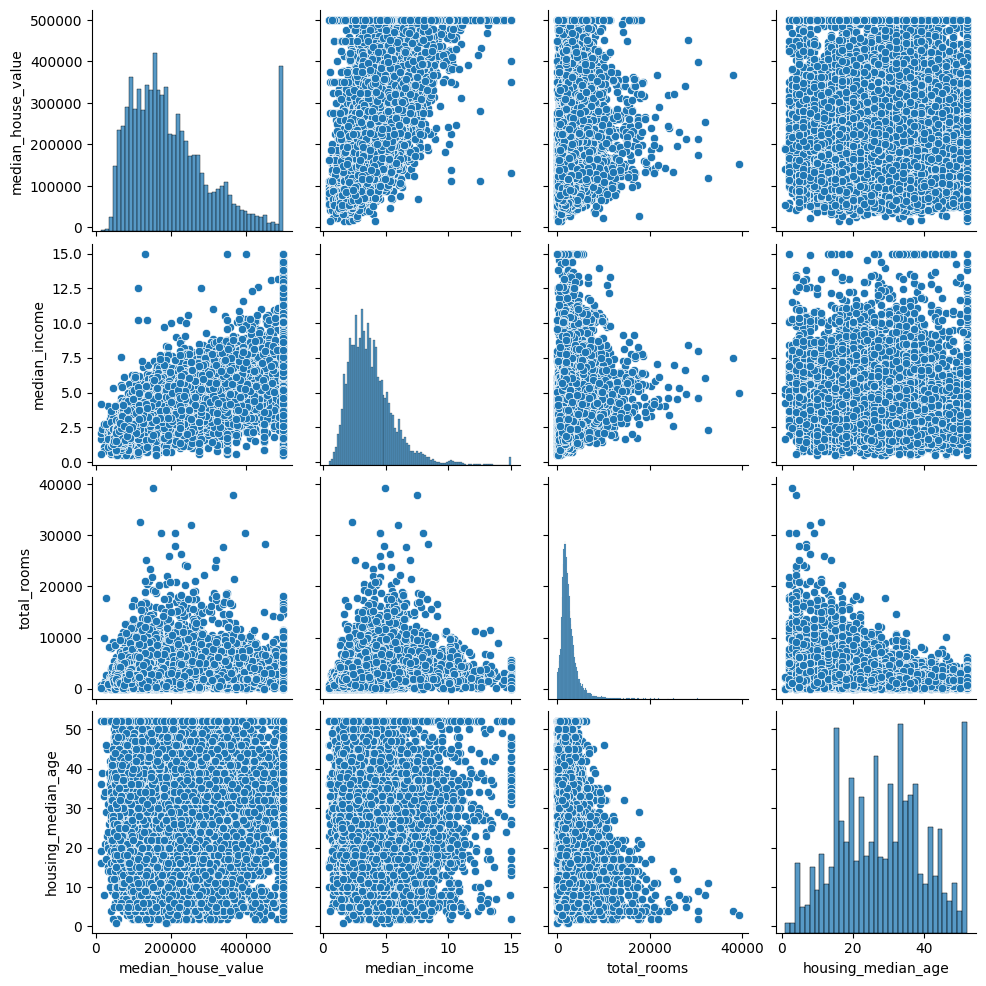

In [13]:
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(df[cols])
plt.show()

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

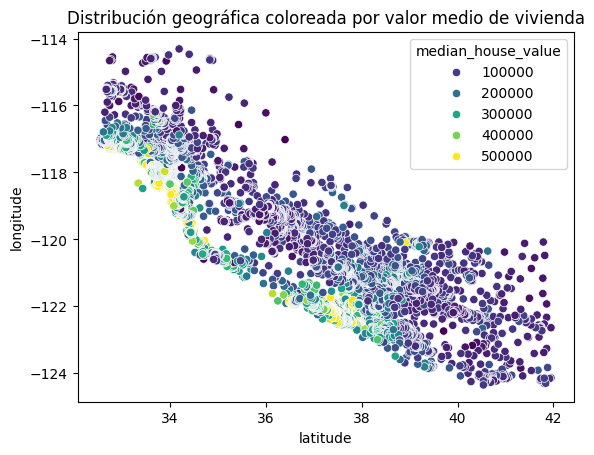

In [14]:
sns.scatterplot(data=df, x="latitude", y="longitude", hue="median_house_value", palette="viridis")
plt.title("Distribución geográfica coloreada por valor medio de vivienda")
plt.show()

11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", len(train_set))
print("Tamaño del conjunto de prueba:", len(test_set))

Tamaño del conjunto de entrenamiento: 16512
Tamaño del conjunto de prueba: 4128


Sí, la línea es adecuada para dividir el DataFrame en conjuntos de entrenamiento y prueba. La función train_test_split realiza una división aleatoria del 80% de los datos para entrenamiento y el 20% para prueba.
En este caso, con 20 640 registros totales:

Conjunto de entrenamiento: 16 512 registros

Conjunto de prueba: 4 128 registros

12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826    0.039971  0.040213      0.973236       0.364964
2           0.318847    0.318798  0.324370      1.732260       0.015195
3           0.350581    0.350533  0.358527      2.266446       0.013820
4           0.176308    0.176357  0.167393      5.056334       0.027480
5           0.114438    0.114341  0.109496      4.318374       0.084674


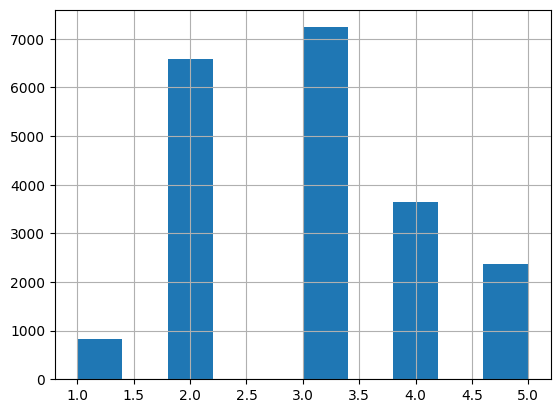

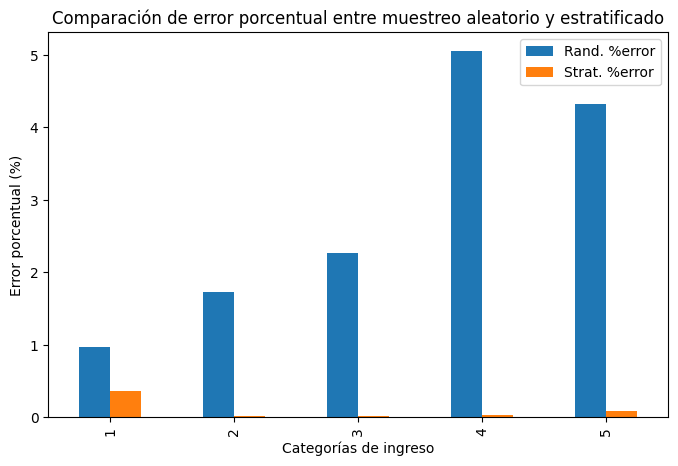

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

df["income_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = abs(100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] = abs(100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

print(compare_props)

compare_props[["Rand. %error", "Strat. %error"]].plot(kind="bar", figsize=(8,5))
plt.title("Comparación de error porcentual entre muestreo aleatorio y estratificado")
plt.xlabel("Categorías de ingreso")
plt.ylabel("Error porcentual (%)")
plt.show()

# El muestreo estratificado mantiene las proporciones de income_cat casi idénticas al dataset original.
# El muestreo aleatorio introduce errores mayores, especialmente en las categorías con menor representación.
# Por tanto, el muestreo estratificado es el método más adecuado para evitar sesgos y asegurar representatividad.



13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




In [23]:
# Pregunta 13 - Creación de nuevas variables y limpieza de datos

from sklearn.impute import SimpleImputer


df_train_num = df_train.drop(columns=["ocean_proximity"]).copy()
df_train_num["income_cat"] = pd.to_numeric(df_train_num["income_cat"], errors="coerce")

num_cols = df_train_num.select_dtypes(include=[np.number]).columns
df_train_num_num = df_train_num[num_cols]

imp_mean = SimpleImputer(strategy="mean")
imp_mean.fit(df_train_num_num)

print("Estadísticas del imputador (medias):")
print(imp_mean.statistics_)

# Se agregaron variables derivadas que representan relaciones entre las características del dataset.
# Se manejaron los valores nulos reemplazando los NaN en total_bedrooms con la mediana.
# Finalmente, se implementó imputación automática para columnas numéricas usando SimpleImputer.


Estadísticas del imputador (medias):
[-1.19575635e+02  3.56393144e+01  2.86534036e+01  2.62253979e+03
  5.34914639e+02  1.41968738e+03  4.97011810e+02  3.87588428e+00
  2.07005322e+05  3.00678295e+00  5.44040595e+00  2.12872772e-01
  3.09646921e+00]


14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


In [24]:
print("\nMedianas del DataFrame (solo numéricas):")
print(df_train_num_num.median().values)

X = imp_mean.transform(df_train_num_num)
housing_tr = pd.DataFrame(X, columns=df_train_num_num.columns)

print("\nDimensiones de la matriz transformada:", housing_tr.shape)
print(housing_tr.head())


Medianas del DataFrame (solo numéricas):
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  3.00000000e+00  5.23234164e+00  2.03027043e-01
  2.81766108e+00]

Dimensiones de la matriz transformada: (16512, 13)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.46     38.52                29.0       3873.0           797.0   
1    -117.23     33.09                 7.0       5320.0           855.0   
2    -119.04     35.37                44.0       1618.0           310.0   
3    -117.13     32.75                24.0       1877.0           519.0   
4    -118.70     34.28                27.0       3536.0           646.0   

   population  households  median_income  median_house_value  income_cat  \
0      2237.0       706.0         2.1736             72100.0         2.0   
1      2015.0       768.0         6.3373            279600.0         5.0   
2       667.0 

# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


In [25]:
from sklearn.preprocessing import OneHotEncoder

print(df_train["ocean_proximity"].unique())

housing_cat = df_train[["ocean_proximity"]]
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print(housing_cat_1hot)
print(cat_encoder.categories_)

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_[0])
housing_tr_ = housing_tr.join(df_cat_1hot)


['INLAND' 'NEAR OCEAN' '<1H OCEAN' 'NEAR BAY' 'ISLAND']
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [26]:
cols = ["longitude", "latitude", "housing_median_age", "total_rooms",
        "total_bedrooms", "population", "households", "median_income",
        "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

housing_scale = housing_tr_[cols]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)
housing_prepared = pd.DataFrame(X, columns=housing_scale.columns)

print(housing_prepared.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.287849  0.635494            0.549020     0.098362        0.128061   
1   0.709163  0.058448            0.117647     0.135168        0.137403   
2   0.528884  0.300744            0.843137     0.041003        0.049613   
3   0.719124  0.022317            0.450980     0.047591        0.083280   
4   0.562749  0.184910            0.509804     0.089790        0.103737   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0    0.062614    0.131441       0.115426        0.0     1.0     0.0       0.0   
1    0.056392    0.143017       0.402574        0.0     0.0     0.0       0.0   
2    0.018610    0.055639       0.163798        0.0     1.0     0.0       0.0   
3    0.025085    0.089806       0.119067        0.0     0.0     0.0       0.0   
4    0.051403    0.107916       0.275617        1.0     0.0     0.0       0.0   

   NEAR OCEAN  
0         0.0  
1         1.0  
2         0.0 


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

df_train = strat_train_set.drop("income_cat", axis=1).copy()
df_test = strat_test_set.drop("income_cat", axis=1).copy()

df_train["rooms_per_household"] = df_train["total_rooms"] / df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["population_per_household"] = df_train["population"] / df_train["households"]

df_test["rooms_per_household"] = df_test["total_rooms"] / df_test["households"]
df_test["bedrooms_per_room"] = df_test["total_bedrooms"] / df_test["total_rooms"]
df_test["population_per_household"] = df_test["population"] / df_test["households"]

df_train_num = df_train.drop("ocean_proximity", axis=1)
df_test_num = df_test.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer(strategy="median")
imp_mean.fit(df_train_num)
train_num_imputed = pd.DataFrame(imp_mean.transform(df_train_num), columns=df_train_num.columns)
test_num_imputed = pd.DataFrame(imp_mean.transform(df_test_num), columns=df_test_num.columns)

cat_encoder = OneHotEncoder(sparse_output=False)
train_cat_1hot = cat_encoder.fit_transform(df_train[["ocean_proximity"]])
test_cat_1hot = cat_encoder.transform(df_test[["ocean_proximity"]])

train_cat_df = pd.DataFrame(train_cat_1hot, columns=cat_encoder.categories_[0])
test_cat_df = pd.DataFrame(test_cat_1hot, columns=cat_encoder.categories_[0])

train_ready = train_num_imputed.join(train_cat_df)
test_ready = test_num_imputed.join(test_cat_df)

cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
        "population", "households", "median_income", "rooms_per_household",
        "bedrooms_per_room", "population_per_household"] + list(cat_encoder.categories_[0])

scaler = MinMaxScaler()
scaler.fit(train_ready[cols])

train_scaled = pd.DataFrame(scaler.transform(train_ready[cols]), columns=cols)
test_scaled = pd.DataFrame(scaler.transform(test_ready[cols]), columns=cols)

housing_train = train_scaled.copy()
housing_test = test_scaled.copy()

print("housing_train shape:", housing_train.shape)
print("housing_test shape:", housing_test.shape)
print(housing_train.head())


housing_train shape: (16512, 16)
housing_test shape: (4128, 16)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.287849  0.635494            0.549020     0.098362        0.128061   
1   0.709163  0.058448            0.117647     0.135168        0.137403   
2   0.528884  0.300744            0.843137     0.041003        0.049613   
3   0.719124  0.022317            0.450980     0.047591        0.083280   
4   0.562749  0.184910            0.509804     0.089790        0.103737   

   population  households  median_income  rooms_per_household  \
0    0.062614    0.131441       0.115426             0.030938   
1    0.056392    0.143017       0.402574             0.041176   
2    0.018610    0.055639       0.163798             0.030281   
3    0.025085    0.089806       0.119067             0.019575   
4    0.051403    0.107916       0.275617             0.035276   

   bedrooms_per_room  population_per_household  <1H OCEAN  INLAND  ISLAND  \
0           0.117

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?


In [28]:
# 1. El modelo empleado se basa en una preparación estructurada de datos:
#    incluye limpieza, imputación, codificación categórica y escalamiento.
#    Esto permite que los algoritmos trabajen con datos numéricos estandarizados
#    y comparables, lo que mejora la estabilidad y desempeño del modelo.

# 2. El modelo de regresión lineal es válido porque todas las variables numéricas
#    fueron normalizadas y las categóricas transformadas en variables dummy.
#    Sin embargo, la relación entre las variables predictoras y la variable objetivo
#    puede no ser estrictamente lineal, lo que limita su capacidad de generalización.

# 3. El score (por ejemplo, R² en una regresión lineal) indica la proporción de la
#    varianza de la variable objetivo explicada por el modelo. Un valor cercano a 1
#    representa un buen ajuste, mientras que valores bajos reflejan un modelo que
#    no captura adecuadamente las relaciones entre las variables.

# 4. El modelo puede ajustarse a otros enfoques más robustos:
#    regresión polinómica, regresión Ridge/Lasso, árboles de decisión,
#    Random Forest, Gradient Boosting o redes neuronales.
#    Cada uno puede capturar relaciones no lineales y mejorar el rendimiento.

# 5. Todo el proceso puede automatizarse con Pipelines de sklearn:
#    se define una secuencia de pasos (imputación, codificación, escalamiento, modelado)
#    que permite entrenar, validar y reproducir el flujo completo en una sola estructura.
#    Esto asegura coherencia, reutilización y menor riesgo de fugas de datos.
